In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('The_Office_line(pilot).csv',encoding = 'utf-8')

In [20]:
df.head()

,Speaker,Line(s)
0,Michael:,All right Jim. Your quarterlies look very goo...
1,Jim:,"Oh, I told you. I couldn't close it. So..."
2,Michael:,So you've come to the master for guidance? Is...
3,Jim:,"Actually, you called me in here, but yeah."
4,Michael:,"All right. Well, let me show you how it's done."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Speaker  223 non-null    object
 1   Line(s)  223 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


It can be seen that the dataset contains two columns.

Now we will find out the unique speakers.

In [22]:
df['Speaker'].unique()

array(['Michael:', 'Jim:', 'Michael: ', 'Pam:', 'Dwight: ', 'Jim: ',
       'Dwight:', 'Jan: ', 'Jan:', 'Packer:', 'Phyllis: ', 'Stanley: ',
       'Oscar: ', 'Angela: ', 'Kevin: ', 'Ryan:', 'Pam: ', 'Oscar:',
       'Stanley:', 'Phyllis:', 'Man:', 'Roy:'], dtype=object)

It can be seen that some entries appear more than once due to presence of ending whitespaces in some. We will remove these whitespaces and also the semicolon.

In [23]:
df['Speaker']=df['Speaker'].str.strip().str.rstrip(':')

In [24]:
df['Speaker'].unique()

array(['Michael', 'Jim', 'Pam', 'Dwight', 'Jan', 'Packer', 'Phyllis',
       'Stanley', 'Oscar', 'Angela', 'Kevin', 'Ryan', 'Man', 'Roy'],
      dtype=object)

In [27]:
df['Speaker'].value_counts()

Michael    82
Pam        40
Jim        33
Dwight     27
Jan        12
Ryan        8
Stanley     5
Roy         5
Packer      3
Oscar       3
Phyllis     2
Man         1
Angela      1
Kevin       1
Name: Speaker, dtype: int64

In [28]:
df[df['Speaker']=='Man']

,Speaker,Line(s)
131,Man,Are you sure about that?


# Which character has the most lines?

Text(0.5, 1.0, 'Line count vs Character')

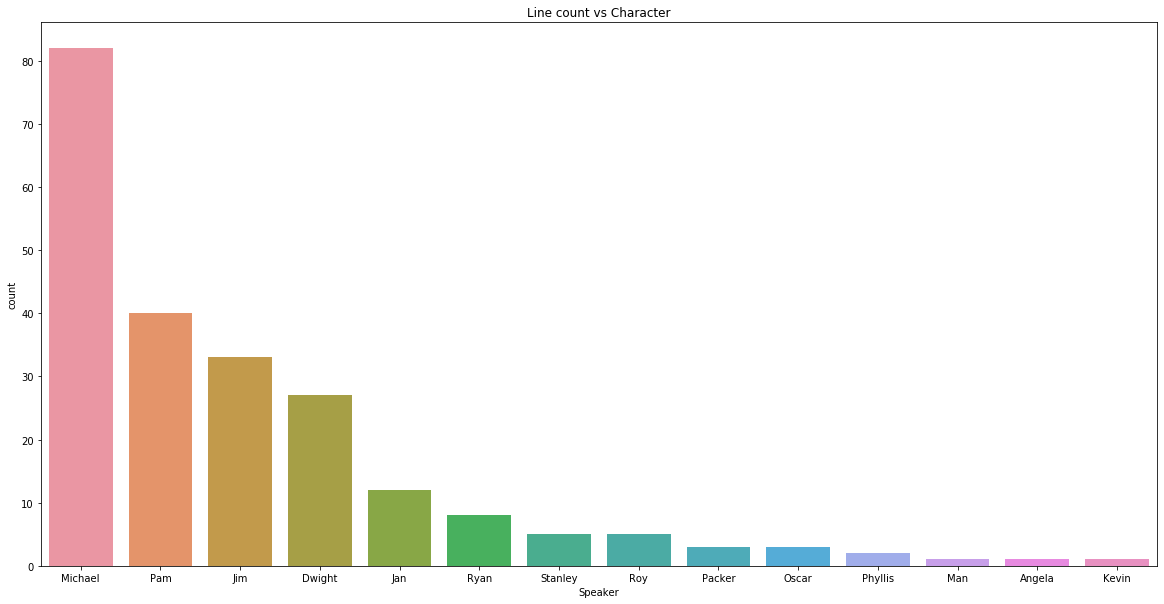

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='Speaker',data=df,order=df['Speaker'].value_counts().index)
plt.title('Line count vs Character')

It can be seen that Michael has the highest number of lines, followed by Pam, Jim and then Dwight . Considering the fact that they are a part of the main cast , this result was expected. Kevin and Angela has the least number of lines.

# Which character uses the most words on an average?

We will create a word count column that will keep track of the number of words.

In [49]:
df['Wordcount']=df['Line(s)'].str.split().str.len()

In [50]:
df['Wordcount']

0      15
1       9
2      14
3       8
4      10
       ..
218     6
219     1
220     4
221     6
222     6
Name: Wordcount, Length: 223, dtype: int64

Text(0.5, 1.0, 'Word count vs Character')

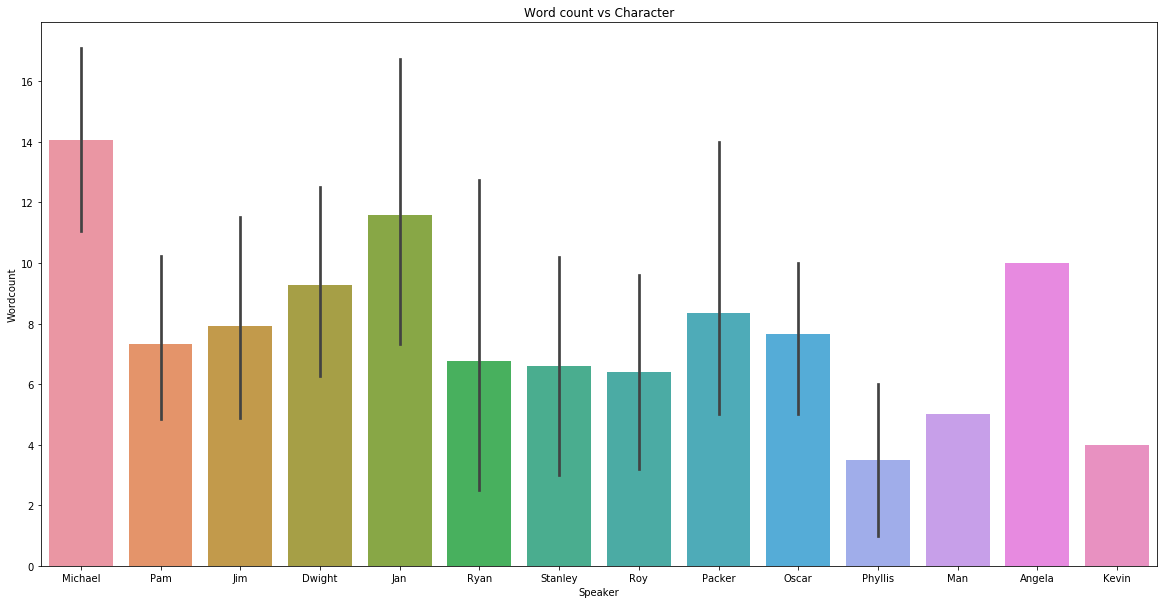

In [52]:
plt.figure(figsize=(20,10))
sns.barplot(x='Speaker',y='Wordcount',data=df,order=df['Speaker'].value_counts().index)
plt.title('Word count vs Character')

While Angela has lesser lines than Pam, Jim or Dwight, she uses more words on an average while speaking.

# Who uses the most words in total?

In [53]:
total_sum = df.groupby(['Speaker'])['Wordcount'].sum().reset_index()
total_sum = total_sum.sort_values(by='Wordcount', ascending=False)

Text(0.5, 1.0, 'Total Wordcount vs Speaker')

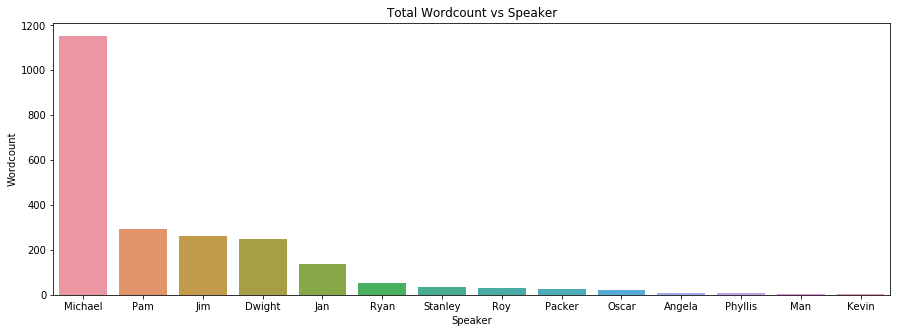

In [55]:
plt.figure(figsize=(15,5))
sns.barplot(x='Speaker',y='Wordcount',data=total_sum)
plt.title('Total Wordcount vs Speaker')

It can be seen that Michael has the most words while Kevin has the least.